# Анализ планируемых и фактических дохофодов и расходов бюджета республики Карелии за 2010-2020 гг

### Оглавление
* [1. Подключение необходимых библиотек](#start)
* [2. Загрузка данных](#dataset)
* [3. Анализ данных](#eda)
* [4. Выводы](#conclusion)

<a id="start"></a>
### 1. Подключение необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as matplotlib
print(matplotlib.__version__)

3.3.4


In [2]:
FIGSIZE = (12,5)
FONTSIZE = 14

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<a id="dataset"></a>
### 2. Загрузка данных

 Годовые отчеты об исполнении бюджета Республики Карелия

In [4]:
PATH = '../data/Годовые отчеты об исполнении бюджета/'
AGE_BEGIN = 2010
AGE_END = 2020
COLUMNS = ['Наименование показателя',
           'Консолидированный бюджет субъекта Российской Федерации ',
           'Бюджет субъекта Российской Федерации']

years = [year for year in range(AGE_BEGIN,AGE_END+1)]
profits_actual = {}
consumptions_actual = {}

for year in years:
    if year > 2015:
        comma = ','
    else:
        comma = ''

    #
    try:
        cons = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'расходы (исполнено){comma} {year}', header=1)
    except:
        cons = pd.read_excel(f'{PATH}{year}.xls', sheet_name=f'расходы (исполнено){comma} {year}', header=1)
    #cons = cons.drop(0)
    consumptions_actual[year] = cons
    consumptions_actual[year].columns = [COLUMNS[0], *consumptions_actual[year].columns[1:-2], *COLUMNS[-2:]]

    #
    try:
        profit = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'доходы (исполнено){comma} {year}', header=0)
    except:
        profit = pd.read_excel(f'{PATH}{year}.xls', sheet_name=f'доходы (исполнено){comma} {year}', header=0)
    profit = profit.drop(0)
    profits_actual[year] = profit
    profits_actual[year].columns = [COLUMNS[0], *profits_actual[year].columns[1:-2], *COLUMNS[-2:]]

In [5]:
consumptions_actual[2010]

,Наименование показателя,Unnamed: 1,Консолидированный бюджет субъекта Российской Федерации,Бюджет субъекта Российской Федерации
0,Расходы бюджета - ИТОГО,х,32339620917.23,25641875414.57
1,Общегосударственные вопросы,000 0100 0000000 000 000,2591149993.17,1513611835.42
2,Расходы,000 0100 0000000 000 200,2513380512.60,1478363164.48
3,Оплата труда и начисления на выплаты по оплате...,000 0100 0000000 000 210,1282779343.89,534614951.03
4,Заработная плата,000 0100 0000000 000 211,1035814557.55,434153563.87
...,...,...,...,...
1161,Перечисления другим бюджетам бюджетной системы...,000 1105 0000000 000 251,1126533200.00,1126533200.00
1162,Итого внутренних оборотов,000 9700 0000000 000 000,8376695112.03,8396542392.39
1163,Перечисления другим бюджетам бюджетной системы...,000 9700 0000000 000 251,8365987954.34,8396542392.39
1164,обслуживание внутренних долговых обязательств,000 9700 0000000 000 231,10707157.69,NaN


Отчёты об исполнении бюджета Республики Карелия

In [6]:
PATH = '../data/Первоначальные бюджетные данные/'
AGE_BEGIN = 2010
AGE_END = 2020

years = [year for year in range(AGE_BEGIN,AGE_END+1)]
profits_planned = {}
consumptions_planned = {}

for year in years:
    if year > 2017:
        comma = ','
    else:
        comma = ''
        
    #
    try:
        cons = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'расходы (план){comma} {year}', header=1)
    except:
        cons = pd.read_excel(f'{PATH}{year}.xls', sheet_name=f'расходы (план){comma} {year}', header=1)
    cons = cons.drop(0)
    consumptions_planned[year] = cons
    consumptions_planned[year].columns = [COLUMNS[0], *consumptions_planned[year].columns[1:-2], *COLUMNS[-2:]]

    #
    try:
        profit = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'доходы (план){comma} {year}', header=0) 
    except:
        profit = pd.read_excel(f'{PATH}{year}.xls', sheet_name=f'доходы (план){comma} {year}', header=0)
    profit = profit.drop(0)
    profits_planned[year] = profit
    profits_planned[year].columns = [COLUMNS[0], *profits_planned[year].columns[1:-2], *COLUMNS[-2:]]

In [7]:
consumptions_planned[2010]

,Наименование показателя,3,Консолидированный бюджет субъекта Российской Федерации,Бюджет субъекта Российской Федерации
1,Расходы бюджета - ИТОГО,000 9600 0000000 000 000,27267621558.77,20214325100.00
2,Общегосударственные вопросы,000 0100 0000000 000 000,2768042966.64,1653416500.00
3,Расходы,000 0100 0000000 000 200,2710194657.21,1638289354.57
4,Оплата труда и начисления на выплаты по оплате...,000 0100 0000000 000 210,1247072609.45,508065946.52
5,Заработная плата,000 0100 0000000 000 211,987022253.76,404548227.00
...,...,...,...,...
1083,Перечисления другим бюджетам бюджетной системы...,000 1105 0000000 000 251,1134000000.00,1134000000.00
1084,Итого внутренних оборотов,000 9700 0000000 000 000,6443451362.00,6973221200.00
1085,Перечисления другим бюджетам бюджетной системы...,000 9700 0000000 000 251,6434006362.00,6973221200.00
1086,обслуживание внутренних долговых обязательств,000 9700 0000000 000 231,9445000.00,NaN


In [8]:
consumptions_actual[2010].isnull().sum().sort_values(ascending=False)

Бюджет субъекта Российской Федерации                       235
Консолидированный бюджет субъекта Российской Федерации      28
Наименование показателя                                      0
Unnamed: 1                                                   0
dtype: int64

Наблюдаем пропуски в данных. Это надо иметь в виду при дальнейшей обработке

<a id="eda"></a>
### 3. Исследовательский анализ данных

Расммотрим планируемые и фактические консолидированный доходы и расходы бюджет субъекта Российской Федерации

In [9]:
profit_a = [profits_actual[y].iloc[0,-2] for y in profits_actual]
cons_a = [consumptions_actual[y].iloc[0,-2] for y in consumptions_actual]
cons_p = [consumptions_planned[y].iloc[0,-2] for y in consumptions_planned]
profit_p = [profits_planned[y].iloc[0,-2] for y in profits_planned]

Планируемые расходы и доходы бюджета

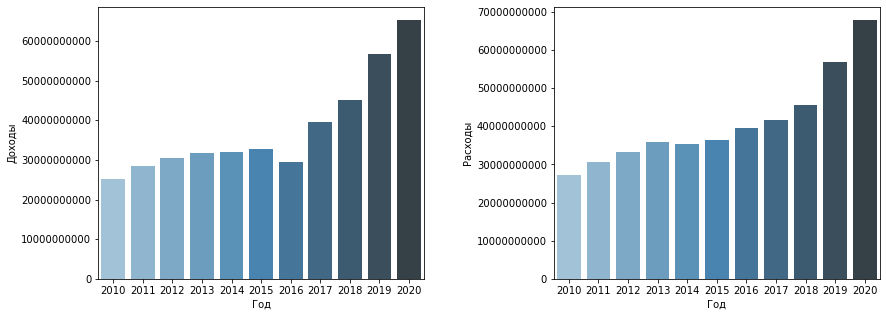

In [10]:
plt.figure(figsize=(14,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1, 2, 1)
g = sns.barplot(x=years, y=profit_p, palette="Blues_d")
g.set(xlabel='Год', ylabel='Доходы')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1, 2, 2)
g = sns.barplot(x=years, y=cons_p, palette="Blues_d")
g.set(xlabel='Год', ylabel='Расходы')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [11]:
print(f"Рост планируемых доходов с {AGE_BEGIN} по {AGE_END} составил: {profit_p[AGE_END-AGE_BEGIN]/profit_p[0]*100:.2f} %")
print(f"Рост планируемых расходов с {AGE_BEGIN} по {AGE_END} составил: {cons_p[AGE_END-AGE_BEGIN]/cons_p[0]*100:.2f} %")

Рост планируемых доходов с 2010 по 2020 составил: 258.64 %
Рост планируемых расходов с 2010 по 2020 составил: 248.95 %


Фактические расходы и доходы бюджета

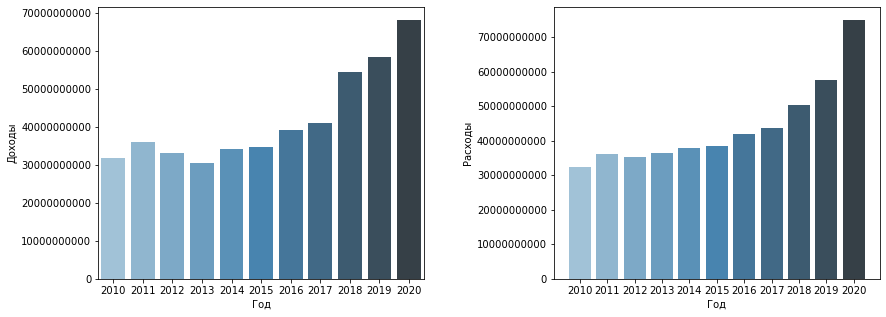

In [12]:
plt.figure(figsize=(14,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1, 2, 1)
g = sns.barplot(x=years, y=profit_a, palette="Blues_d")
g.set(xlabel='Год', ylabel='Доходы')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1, 2, 2)
g = sns.barplot(x=years, y=cons_a, palette="Blues_d")
g.set(xlabel='Год', ylabel='Расходы')
plt.ticklabel_format(style='plain', axis='y')
plt.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()

In [13]:
print(f"Рост планируемых доходов с {AGE_BEGIN} по {AGE_END} составил: {profit_a[AGE_END-AGE_BEGIN]/profit_a[0]*100:.2f} %")
print(f"Рост планируемых расходов с {AGE_BEGIN} по {AGE_END} составил: {cons_a[AGE_END-AGE_BEGIN]/cons_a[0]*100:.2f} %")

Рост планируемых доходов с 2010 по 2020 составил: 214.07 %
Рост планируемых расходов с 2010 по 2020 составил: 231.95 %


Изменение фактических расходов относительно планируемых

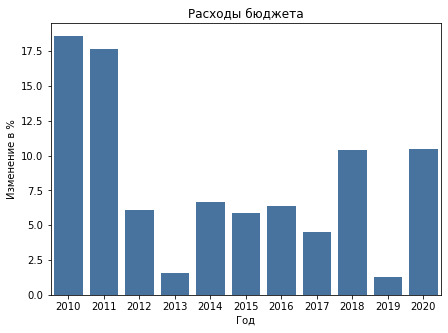

In [14]:
plt.figure(figsize=(7,5))
g = sns.barplot(x=years, y=[(a/p-1)*100 for p,a in zip(cons_p,cons_a)], color='#3973ac')
g.set(xlabel='Год', ylabel='Изменение в %')
plt.title('Расходы бюджета')
plt.show()

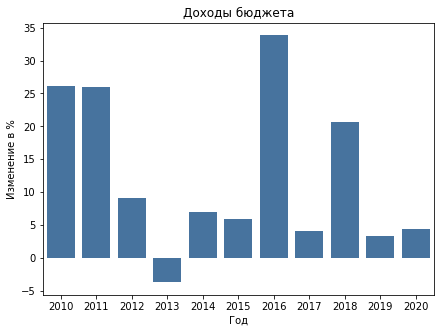

In [15]:
plt.figure(figsize=(7,5))
g = sns.barplot(x=years, y=[(a/p-1)*100 for p,a in zip(profit_p,profit_a)], color='#3973ac')
g.set(xlabel='Год', ylabel='Изменение в %')
plt.title('Доходы бюджета')
plt.show()

Сравнение планируемых и фактических доходов и расходов бюджета

In [16]:
def plot_compare_plan_actual(plan=None, actual=None, title=None):
    width = 0.4  # the width of the bars
    x = np.arange(len(years))

    fig, ax = plt.subplots(figsize=FIGSIZE)
    rects1 = ax.bar(x - width/2,  plan, width, label='Планируемые')
    rects2 = ax.bar(x + width/2, actual, width, label='Фактические')
    #ax.plot(x, actual)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('руб', fontsize=FONTSIZE+2)
    ax.set_xlabel('год', fontsize=FONTSIZE+2)

    ax.set_title(title, fontsize=FONTSIZE+4)
    ax.set_xticks(x)
    ax.set_xticklabels([str(y) for y in years], fontsize=FONTSIZE)
    #ax.set_yticklabels(fontsize=FONTSIZE)
    ax.legend()

    rects = ax.patches

    # Make some labels.
    labels = [f"{(a/p-1)*100:.2f}%" for p,a in zip(plan*2,actual*2)]

    for i, (rect, label) in enumerate(zip(rects, labels)):
        if i%2:
            continue
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width(), height + 500, label, ha="center", va="bottom", fontsize=FONTSIZE+2
        )

    fig.tight_layout()

    plt.show()

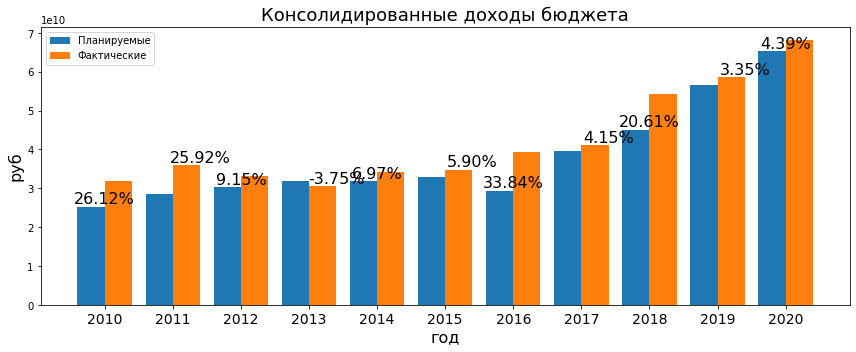

In [17]:
plot_compare_plan_actual(profit_p, profit_a, 'Консолидированные доходы бюджета')

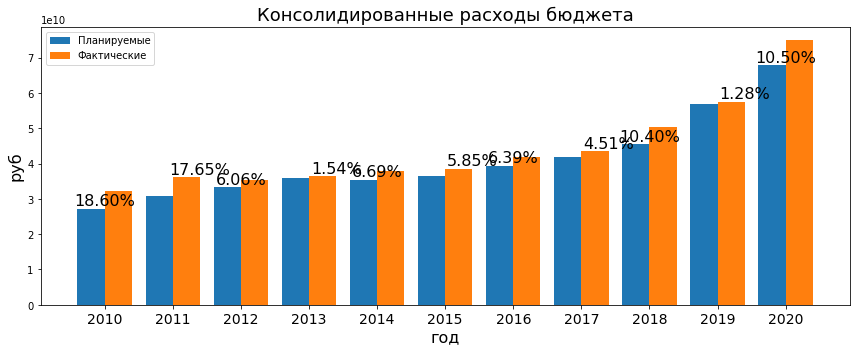

In [18]:
plot_compare_plan_actual(cons_p, cons_a, 'Консолидированные расходы бюджета')

<a id="conclusion"></a>
### 4. Выводы

За рассмотренное десятилетие, фактические расходы и доходы ежегодно отличаются в большую сторону по сравнению с планируемыми.  
Максимум роста фактических доходов: 26.12% в 2011 году  
Максимум роста фактических расходов: 18.6% в 2010 году

Одним из преимуществ разрабатываемой аналитической системы должно быть повышение качества бюджетного планирования, что уменьшит количество изменений в планируемый бюджет. 